In [ ]:
import tensorflow as tf
import  numpy as np
import keras
from keras.layers import Dense

In [ ]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(Dense(units=1, input_shape=(1, ), activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

In [ ]:
reg = model.fit(c, f, epochs=500, verbose=False)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(reg.history['loss'])

In [ ]:
print(model.predict([100]))

In [ ]:
print(model.get_weights())

импорт нужных библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.datasets import mnist, fashion_mnist

считавание данных mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

стандартизация

In [3]:
X_train = X_train / 255
X_test = X_test / 255

Вывод примера фотографий

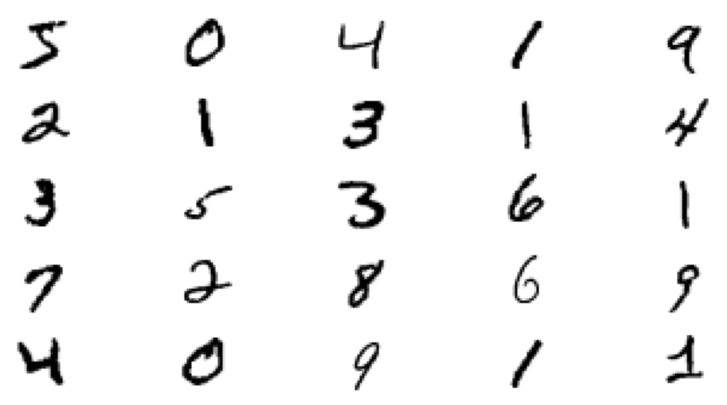

In [4]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

Переводим в правильный формат вывода
Пример:
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
...
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Создаем полносвязную НС с:
* 28x28 = 784 нейронов входного слоя
* 128 нейронов скрытого слоя
* 10 нейронов выходного слоя

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


компиляция модели

In [7]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

Тренировка модели

In [8]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 3s 1ms/step - loss: 0.2879 - accuracy: 0.9178 - val_loss: 0.1519 - val_accuracy: 0.9568
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1287 - accuracy: 0.9615 - val_loss: 0.1248 - val_accuracy: 0.9622
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0897 - accuracy: 0.9738 - val_loss: 0.0981 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.1000 - val_accuracy: 0.9706
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0876 - val_accuracy: 0.9739
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0894 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0877 - val_accurac

проверка работы сети на тестовом множестве

In [9]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 0s 788us/step - loss: 0.0821 - accuracy: 0.9777


[0.08205252140760422, 0.9776999950408936]

Пример выходных значений сети, ее предсказание и картинка для которой предсказали

1/1 [==============================] - 0s 65ms/step
[[1.1611666e-10 2.3159233e-11 1.9978603e-07 1.3984501e-05 8.9961904e-15
  2.0327602e-09 5.0370961e-15 9.9998558e-01 1.2084094e-08 2.2168271e-07]]
7


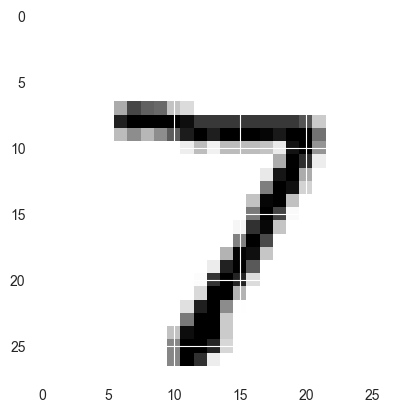

(0, 99)

In [10]:
n = 0
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()
0, 99

In [12]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 838us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты

In [14]:
mask = pred == y_test
print(mask[:10])

x_false = X_test[~mask]
y_false = X_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(224, 28, 28)


Вывод неверно предсказанных

Значение сети: 7


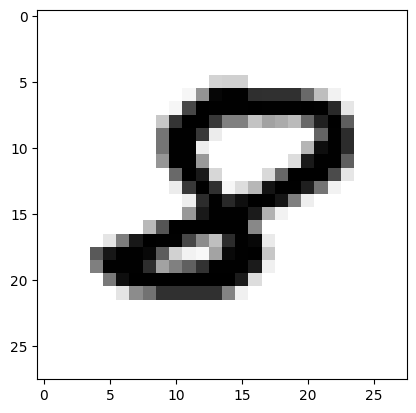

Значение сети: 2


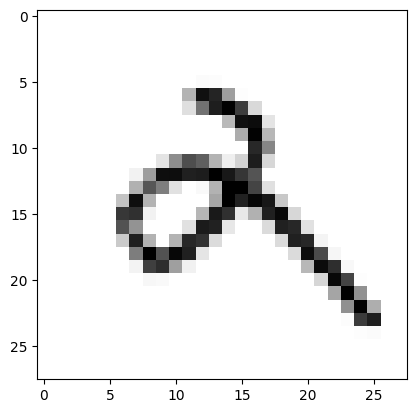

Значение сети: 1


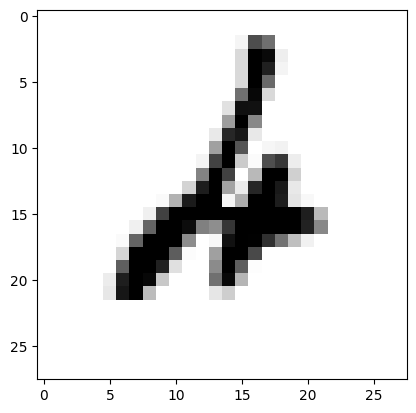

Значение сети: 0


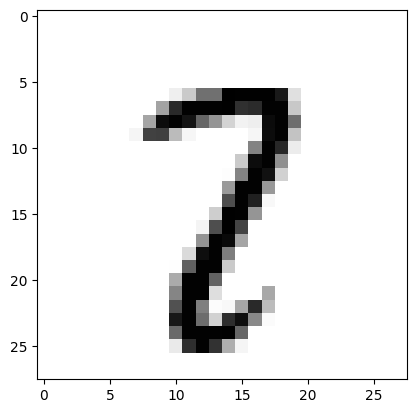

Значение сети: 4


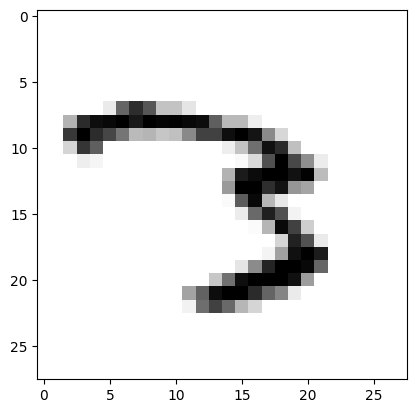

In [15]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()